In [69]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

csv = pd.read_csv('SolarPrediction.csv', sep=',')
df = pd.DataFrame(csv)[['UNIXTime', 'Radiation', 'Temperature', 'Pressure', 'Humidity', 'WindDirection(Degrees)', 'Speed']]

# Перевод из Фаренгейтов в градусы Цельсия
df['Temperature'] = (df['Temperature'] - 32) * 5/9
# Перевод из миль в час в метры в секунду
df['Speed'] = df['Speed'] * 0.44704

# Добавление атрибута ощущаемой температуры по формуле AT = -2.7 + 1.04T + 2.0R - 0.65*V 
df["ApparentTemperature"] = -2.7 + 1.04 * df['Temperature'] + 2.0 * df['Humidity'] / 100 - 0.65 * df['Speed']

UNIXTime
  Среднее значение = 1478047264.94
  Среднеквадратическое отклонение = 3005036.64
  Пропущенных значений: 0


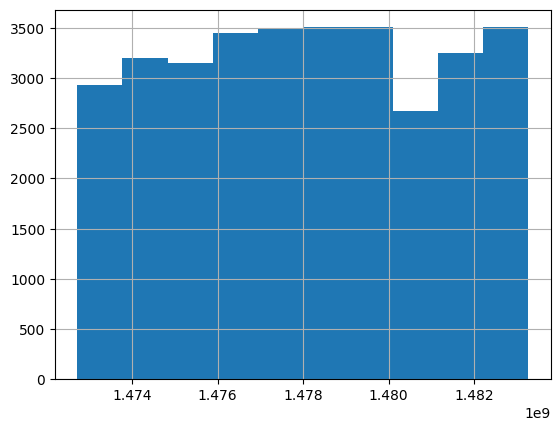

Radiation
  Среднее значение = 207.12
  Среднеквадратическое отклонение = 315.92
  Пропущенных значений: 0


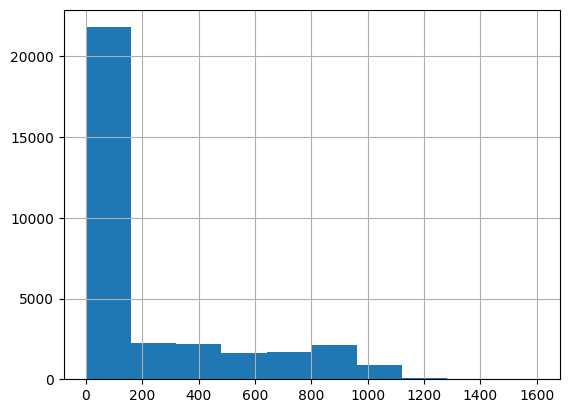

Temperature
  Среднее значение = 10.61
  Среднеквадратическое отклонение = 3.45
  Пропущенных значений: 0


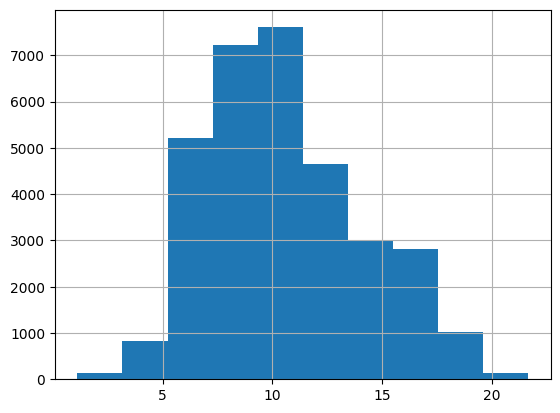

Pressure
  Среднее значение = 30.42
  Среднеквадратическое отклонение = 0.05
  Пропущенных значений: 0


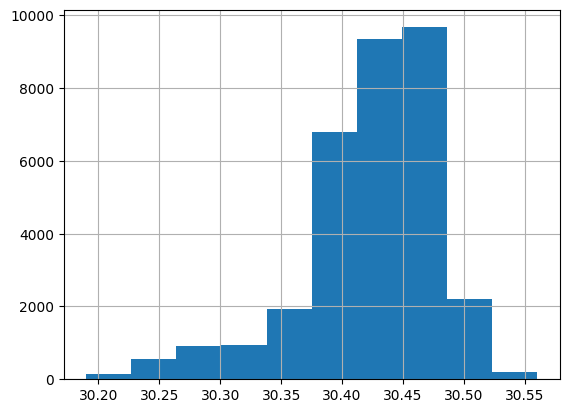

Humidity
  Среднее значение = 75.02
  Среднеквадратическое отклонение = 25.99
  Пропущенных значений: 0


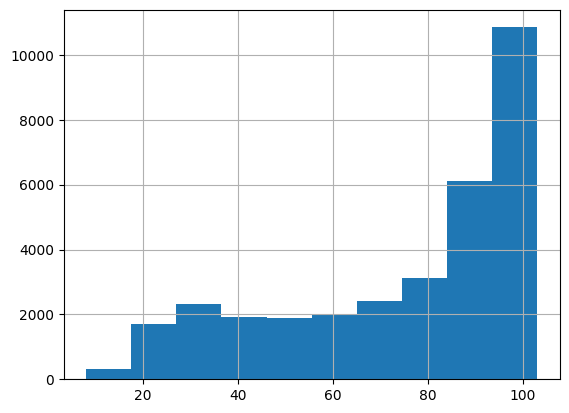

WindDirection(Degrees)
  Среднее значение = 143.49
  Среднеквадратическое отклонение = 83.17
  Пропущенных значений: 0


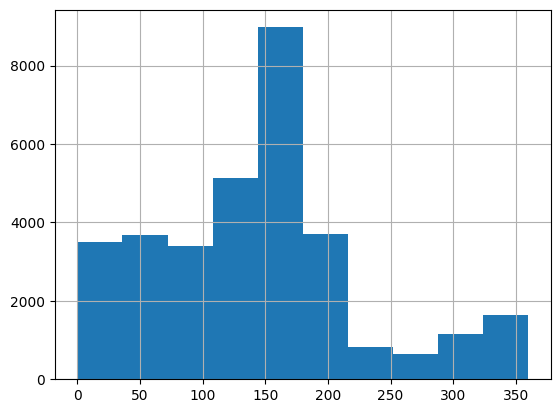

Speed
  Среднее значение = 2.79
  Среднеквадратическое отклонение = 1.56
  Пропущенных значений: 0


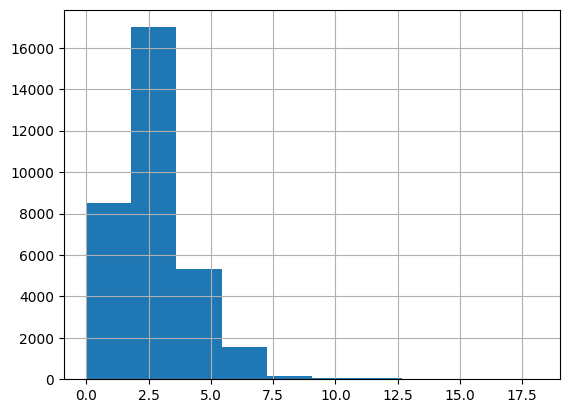

ApparentTemperature
  Среднее значение = 8.02
  Среднеквадратическое отклонение = 3.68
  Пропущенных значений: 0


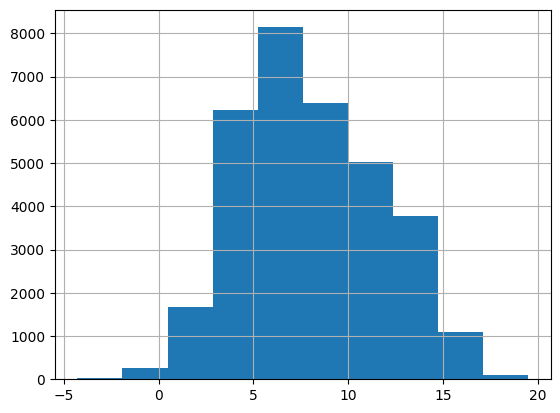

In [70]:
for column in df.columns:
    print(f'{column}\n  Среднее значение = {df[column].mean():.2f}\n  Среднеквадратическое отклонение = {df[column].std():.2f}')
    print(f'  Пропущенных значений: {df[column].isnull().sum()}')
    df[column].hist()
    plt.show()

# Судя по графикам выбросы отсутствуют, значения находятся в пределах нормы

# Атрибуты не имеют пропущенных значений

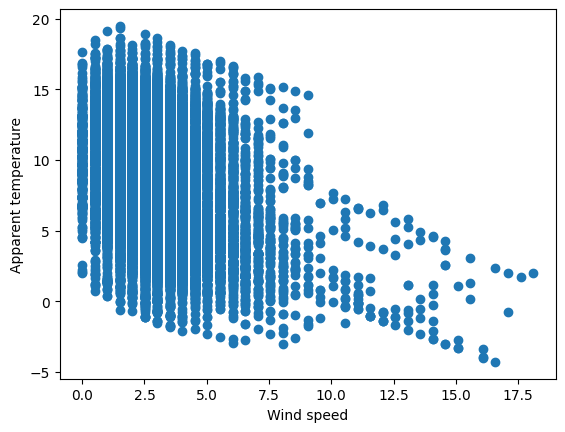

In [71]:
plt.scatter(df['Speed'], df['ApparentTemperature'])
plt.xlabel('Wind speed')
plt.ylabel('Apparent temperature')
plt.show()

# Ярко выражена большая группа со значениями скорости ветра до 6 метров в секунду и
# значениями ощущаемой температуры от 0 до 15 градусов

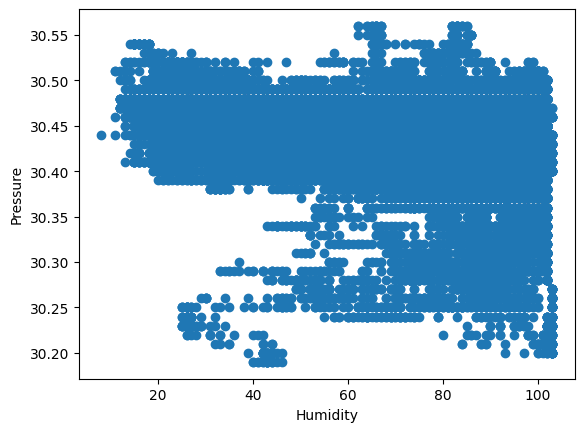

In [72]:
plt.scatter(df['Humidity'], df['Pressure'])
plt.xlabel('Humidity')
plt.ylabel('Pressure')
plt.show()

# Можно выделить два основных кластера:
# Первый со значениями влажности от 10 до 100% и атмосферным давлением от 30.4 до 30.5
# Второй кластер с влажностью от 75 до 100% и давлением от 30.25 до 30.4

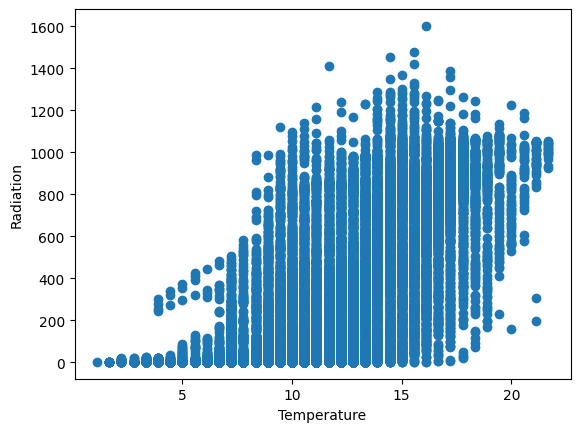

In [73]:
plt.scatter(df["Temperature"], df["Radiation"])
plt.xlabel("Temperature")
plt.ylabel("Radiation")
plt.show()

# Ярко выражена большая группа со значениями радиации менее 1000 и температурой между 10 и 15

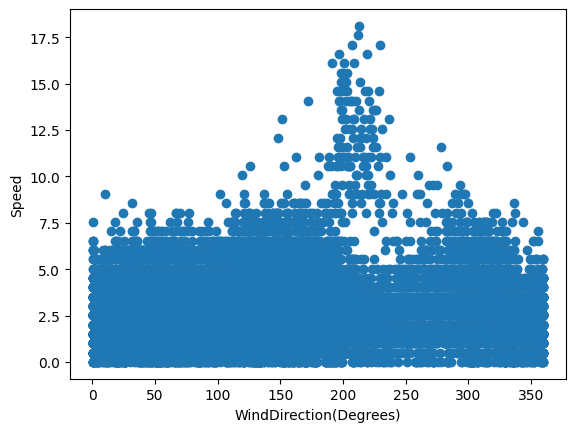

In [74]:
plt.scatter(df["WindDirection(Degrees)"], df["Speed"])
plt.xlabel("WindDirection(Degrees)")
plt.ylabel("Speed")
plt.show()

# Сильно выражена группа со скоростью ветра менее 7.5 метров в секунду,
# но при этом также существует группа от 200 до 230 градусов, в которой
# скорость ветра значительно выше

In [75]:
df.sample(5)

# Датасет до нормализации

,UNIXTime,Radiation,Temperature,Pressure,Humidity,WindDirection(Degrees),Speed,ApparentTemperature
8251,1477743321,1.19,6.111111,30.39,98,12.64,1.005840,4.961760
6159,1473121506,961.28,15.555556,30.41,89,347.65,4.524045,12.317149
7950,1477833924,1.21,8.888889,30.40,102,126.81,1.005840,7.930648
16738,1480332318,1.20,8.333333,30.44,27,168.26,4.524045,3.566038
7081,1472837705,338.35,13.888889,30.45,48,124.77,1.005840,12.050648


In [76]:
from sklearn.preprocessing import MinMaxScaler

# Нормализуем датасет при помощи MinMaxScaler
minmax_processed = MinMaxScaler().fit_transform(df)
df_scaled = (pd.DataFrame(minmax_processed, index=df.index,columns=df.columns))
df_scaled.sample(5)

,UNIXTime,Radiation,Temperature,Pressure,Humidity,WindDirection(Degrees),Speed,ApparentTemperature
1145,0.203929,0.000081,0.378378,0.756757,0.547368,0.438782,0.111111,0.450767
661,0.218587,0.089010,0.675676,0.459459,0.810526,0.000222,0.055556,0.766637
3248,0.142849,0.555742,0.783784,0.783784,0.431579,0.059829,0.111111,0.806063
10757,0.404669,0.369428,0.513514,0.783784,0.557895,0.246290,0.083210,0.586937
1634,0.189898,0.000081,0.405405,0.675676,0.926316,0.462652,0.055556,0.532857


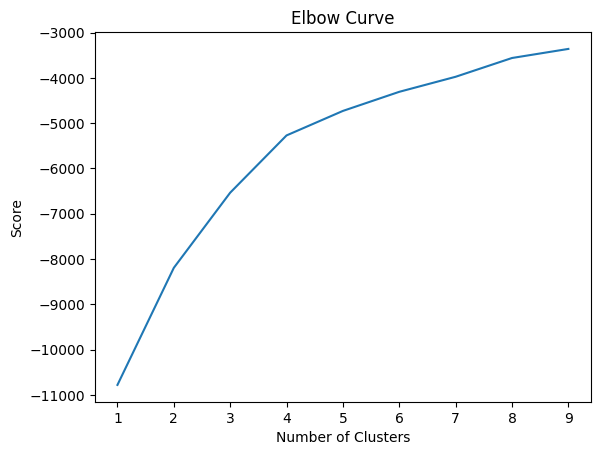

In [77]:
from sklearn.cluster import KMeans

# Построим график для метода "Локтя"
Nc = range(1, 10)
kmeans = [KMeans(n_clusters=i, n_init='auto') for i in Nc]
score = [kmeans[i].fit(df_scaled).score(df_scaled) for i in range(len(kmeans))]
plt.plot(Nc,score)
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('Elbow Curve')
plt.show()

# Воспользуемся методом "Локтя", выберем на графике точку, в которой присутствует острый изгиб
# В нашем случае это 4

In [78]:
# Применим метод KMeans к датасету с 4 кластерами
kmeans = KMeans(n_clusters=4, n_init='auto')
kmeans.fit(df_scaled)
df['Cluster'] = kmeans.labels_
df.sample(5)

,UNIXTime,Radiation,Temperature,Pressure,Humidity,WindDirection(Degrees),Speed,ApparentTemperature,Cluster
28994,1481920218,742.83,10.555556,30.27,67,18.52,1.506525,8.638537,1
6232,1473099005,486.42,13.333333,30.43,76,271.74,4.023360,10.071483,0
12360,1476502530,36.06,16.666667,30.46,34,33.88,4.023360,12.698149,3
23223,1478385301,934.50,18.333333,30.47,24,31.76,6.035040,12.923891,3
19566,1479482720,1.21,7.777778,30.42,31,154.68,4.023360,3.393705,2


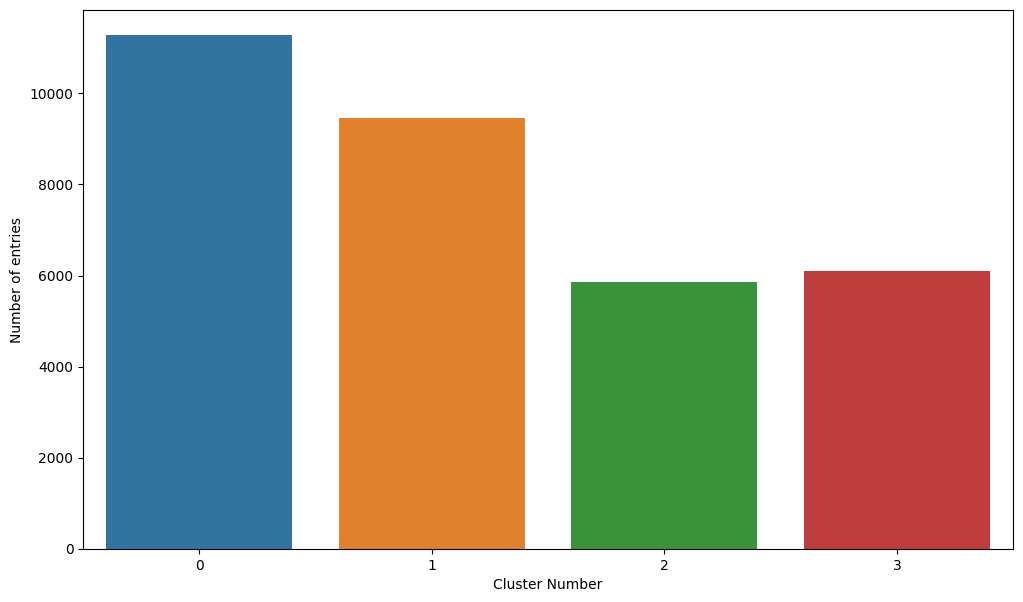

In [79]:
# Выведем график распределения значений по кластерам
plt.figure(figsize=(12,7))
axis = sns.barplot(x=np.arange(0,4,1), y=df.groupby(['Cluster']).count()['Radiation'].values)
x=axis.set_xlabel("Cluster Number")
y=axis.set_ylabel("Number of entries")

In [80]:
# Выведем средние значения по каждому кластеру
df.groupby(['Cluster']).mean()

# Кластер 0 - средние значения радиации (mean = 92)
# Кластер 1 - значения чуть выше средних (mean = 103)
# Кластер 2 - низкие значения радиации (mean = 746)
# Кластер 3 - высокие значения радиации (mean = 37)

,UNIXTime,Radiation,Temperature,Pressure,Humidity,WindDirection(Degrees),Speed,ApparentTemperature
Cluster,,,,,,,,
0,1.475367e+09,91.646894,10.627889,30.432126,91.263769,137.514456,2.348802,8.651558
1,1.481176e+09,103.487279,8.165444,30.386546,90.579966,172.790646,2.832984,5.762222
2,1.478881e+09,36.705724,9.237165,30.442350,38.558377,164.703419,3.512730,5.394544
3,1.477350e+09,745.983236,15.709998,30.443402,55.898030,88.629731,2.850596,12.903471


In [81]:
# Количество записей в каждом кластере
size_array = list(df.groupby(['Cluster']).count()['Radiation'].values)

size_array

[11275, 9454, 5867, 6090]

In [82]:
df[df['Cluster']==size_array.index(sorted(size_array)[0])].sample(5)

# Преимущественно низкие значения радиации

,UNIXTime,Radiation,Temperature,Pressure,Humidity,WindDirection(Degrees),Speed,ApparentTemperature,Cluster
20230,1479283204,1.23,8.888889,30.48,33,153.37,4.524045,4.263815,2
12069,1476592220,1.22,15.000000,30.49,16,120.23,0.000000,13.220000,2
12586,1476432923,1.24,10.555556,30.49,36,172.60,3.518205,6.710945,2
3059,1474290603,1.24,8.888889,30.41,51,176.84,4.023360,4.949260,2
9053,1477502421,22.08,10.000000,30.43,24,182.41,3.017520,6.218612,2


In [83]:
df[df['Cluster']==size_array.index(sorted(size_array)[1])].sample(5)

# Преимущественно высокие значения радиации

,UNIXTime,Radiation,Temperature,Pressure,Humidity,WindDirection(Degrees),Speed,ApparentTemperature,Cluster
19470,1479511517,656.02,16.666667,30.41,23,43.04,0.500685,14.767888,3
16636,1480362918,699.01,13.888889,30.47,60,119.77,1.005840,12.290648,3
2634,1474421104,589.20,15.555556,30.38,84,6.42,3.017520,13.196390,3
17182,1480199118,782.87,14.444444,30.44,73,81.55,1.005840,13.128426,3
4407,1473800706,983.00,18.333333,30.46,50,304.68,2.512365,15.733630,3


In [84]:
df[df['Cluster']==size_array.index(sorted(size_array)[2])].sample(5)

# В основном низкие значения с выбросами

,UNIXTime,Radiation,Temperature,Pressure,Humidity,WindDirection(Degrees),Speed,ApparentTemperature,Cluster
18110,1479919801,20.14,6.666667,30.42,99,167.07,1.506525,5.234092,1
32521,1480635601,181.06,7.222222,30.38,93,87.48,3.518205,4.384278,1
25313,1483026040,1.19,3.333333,30.34,92,198.57,2.512365,0.973630,1
16710,1480340717,1.19,6.111111,30.44,68,147.25,4.023360,2.400372,1
30998,1481317251,179.73,12.777778,30.41,74,334.87,0.500685,11.743444,1


In [85]:
df[df['Cluster']==size_array.index(sorted(size_array)[3])].sample(5)

# В основном низкие и средние значения со значительными выбросами

,UNIXTime,Radiation,Temperature,Pressure,Humidity,WindDirection(Degrees),Speed,ApparentTemperature,Cluster
15511,1475538021,391.82,12.222222,30.43,101,71.55,3.017520,10.069723,0
20544,1479189001,1.22,10.000000,30.48,101,56.48,3.017520,7.758612,0
14056,1475982923,78.35,13.888889,30.38,96,321.10,2.512365,12.031407,0
7127,1472823905,2.17,10.000000,30.42,71,157.64,3.017520,7.158612,0
3305,1474212311,1.22,10.555556,30.43,101,141.07,3.017520,8.336390,0


In [ ]:
# Самая крупная группа - это кластер 0, она содержит 11275 записей со средним значением 91.64
# Среднее значение достигается за счет выбросов (увеличений солнечной активности в течение дня)

# Вторая по размеру группа - кластер 1, она содержит схожие с кластером 0 значения, но содержит более крупные выбросы
# Количество записей - 9454, а среднее значение 103.48

# Кластеры 2 и 3 практически равны по размеру, 5867 и 6090 соответственно

# В кластере 2 содержатся преимущественно низкие значения и выбросы почти отсутствуют, среднее значение равно 36.70

# В кластере 3 содержатся преимущественно высокие значения
# и выбросом являются уже низкие значения, среднее значение равно 745.98

In [ ]:
# Если обратить внимание на таблицу средних значений можно увидеть, что при температуре выше средней
# сильно возрастает уровень радиации, в то время как при температуре ниже средней уменьшения уровня радиации не наблюдается

# Обратно этому происходит со скоростью ветра, при высокой скорости ветра уровень радации меньше

# Также при высоких значениях влажности (90% в среднем) уровень радиации находится на среднем уровне,
# но при более низкой влажности (<55%) уровень радиации может как значительно возрастать, так и быть на низком уровне

# От атмосферного давления уровень радиации не зависит